In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
import os
#datapath = os.path.join("\.")
datapath = ""
print( datapath )

In [3]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Load the data
#leistung = pd.read_csv(datapath + "DatenLeistung.csv", thousands='.', delimiter='\t' )
#print( leistung )

df = pd.read_excel('DatenLeistung.xls')


In [4]:
# Datum und Personen extrahieren
x2 = df.as_matrix()
x2 = x2[0:,1:6]
print( x2 )

# feature scaling only for classifier (k-mean ..?)
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x3 = sc.fit_transform( x2 )
#print( x3 )

[[  1  19 120  20 175]
 [  2  19 104  16 156]
 [  3  18 109  16 149]
 ..., 
 [  4  16 103  15 131]
 [  5  17 117  16 164]
 [  6  18 116  16 164]]


In [5]:
# Leistung
y2 = df.as_matrix()
y2 = y2[0:,6:].ravel()
print( y2 )

[-7 -2 -8 ..., -1  5 -3]


In [6]:
# in Training und Validierung aufteilen

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x2, y2, test_size=0.6, random_state=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CDA2994F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CDA2B07C18>]], dtype=object)

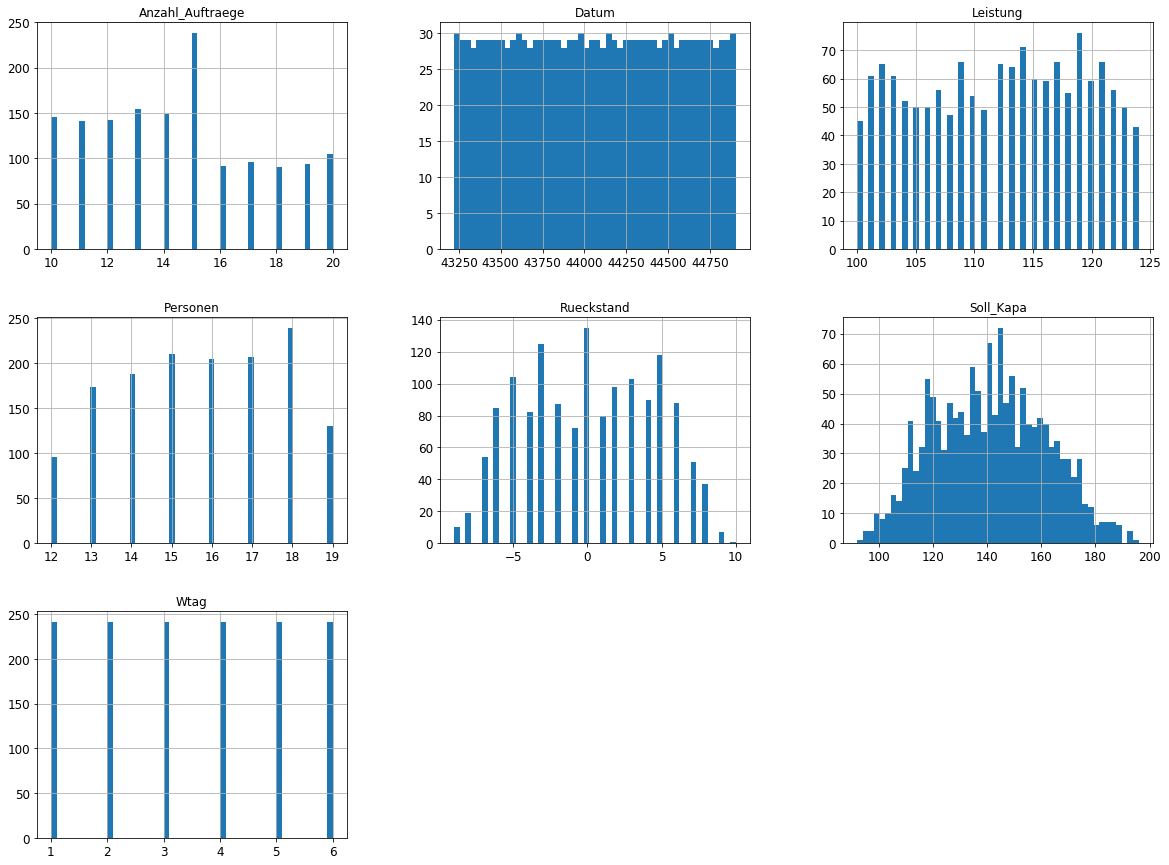

In [7]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [51]:
est = GradientBoostingRegressor(n_estimators=100000, learning_rate=0.2,
      max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

In [9]:
# Vorhersage
#X_test = np.array( [(6,18,116,16,164)] )
#print(X_test)
#print( est.predict(X_test) )

In [59]:
from sklearn.metrics import accuracy_score
y_pred = est.predict(X_test)
predictions = [round(value) for value in y_pred]
compare = [round(value) for value in y_test]
accuracy = accuracy_score(compare, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.06%


In [39]:
from sklearn.model_selection import cross_val_score
#est = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.2,
#      max_depth=1, random_state=0, loss='ls')

In [46]:
scores = cross_val_score(est, X_train, y_train, n_jobs=3,cv=5)
scores         

array([ 0.97641685,  0.97806586,  0.97355411,  0.96210774,  0.96746683])

In [50]:
y_pred = est.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=2)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=20, normalize=False)

In [20]:
y_pred = lin_reg.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 39.29%


In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [14]:
y_pred = tree_reg.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 21.54%


In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42,n_estimators=100)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
y_pred = forest_reg.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 17.28%


In [26]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred = svm_reg.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 38.71%


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 300], 'max_features': [1, 4, 5]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [1, 3, 5]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 300], 'max_features': [1, 4, 5]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [1, 3, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [34]:
y_pred = grid_search.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 17.05%
